## TP SVM

<table>
  <tr>
    <td>
      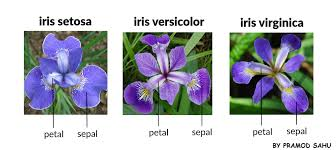
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Figure 1.</b> Exemples de données du <a href="https://scikit-learn.org/stable/datasets/loads.html#iris-dataset">dataset Iris</a> (scatter plot des longueurs de pétales et sépales).<br/>
      © <a href="https://scikit-learn.org">scikit-learn</a>, CC BY-SA 3.0.
    </td>
  </tr>
</table>

## Question 1

Visualisations : Utilise Matplotlib/Seaborn pour plotter les frontières de décision. Par exemple, avec meshgrid et contourf pour visualiser l'hyperplan sur Iris (voir sklearn exemples). Ajoute `sns.scatterplot` pour les points colorés par classe.

Cross-Validation : Au lieu d'un simple split (ex. 1), utilise `GridSearchCV `ou `cross_val_score` pour tuner C et kernel automatiquement (e.g., `param_grid = {'C': np.logspace(-5, 5, 10), 'kernel': ['linear', 'rbf']}).`

Accuracy (linéaire) : 0.7
Matrice de confusion :
 [[16 14]
 [ 1 19]]
Précision : 0.7950089126559715
Rappel : 0.7
F1-score : 0.695303091128061

Rapport de classification :

              precision    recall  f1-score   support

           1      0.941     0.533     0.681        30
           2      0.576     0.950     0.717        20

    accuracy                          0.700        50
   macro avg      0.758     0.742     0.699        50
weighted avg      0.795     0.700     0.695        50



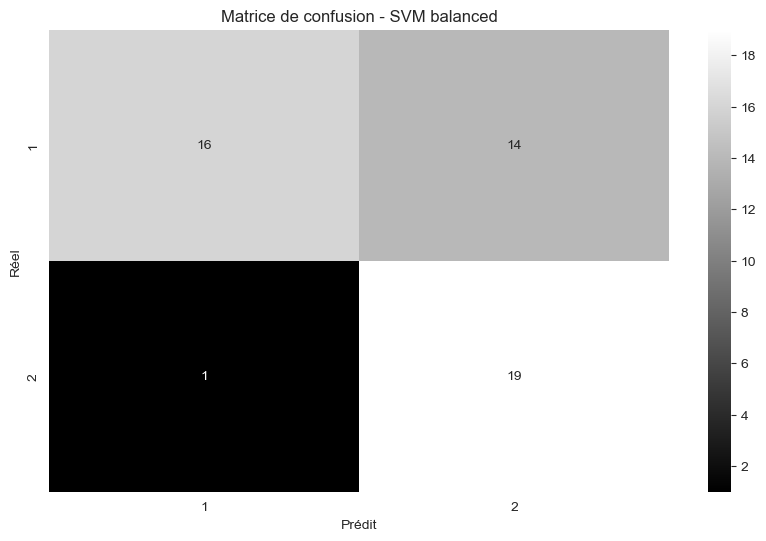

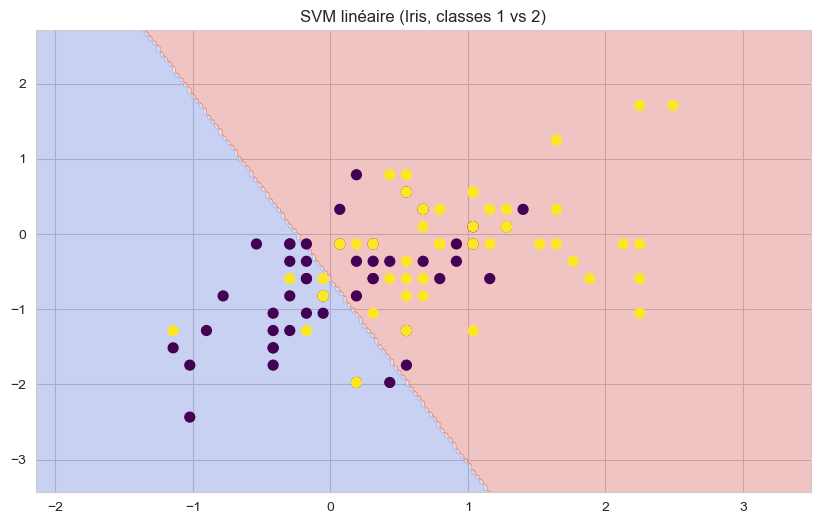

In [14]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA






scaler = StandardScaler()
iris = datasets.load_iris()
 
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]


# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Modèle SVM linéaire
clf_lin = SVC(kernel="linear", C=1)
clf_lin.fit(X_train, y_train)

# Prédiction
y_pred = clf_lin.predict(X_test)

print("Accuracy (linéaire) :", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Métriques complémentaires
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

# Rapport complet par classe
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - SVM balanced")
plt.show()

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Tracé frontière
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = clf_lin.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis" , s=50)
plt.title("SVM linéaire (Iris, classes 1 vs 2)")
plt.show()

## Question 2

In [16]:
clf_poly = SVC(kernel="poly", degree=3, C=1)
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_poly.predict(X_test)

print("Accuracy (polynomial) :", accuracy_score(y_test, y_pred_poly))
# Métriques complémentaires
print("Précision :", precision_score(y_test, y_pred_poly, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred_poly, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred_poly, average='weighted'))

# Rapport complet par classe
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred_poly, digits=3))

Accuracy (polynomial) : 0.54
Précision : 0.71869918699187
Rappel : 0.54
F1-score : 0.49533417402269864

Rapport de classification :

              precision    recall  f1-score   support

           1      0.889     0.267     0.410        30
           2      0.463     0.950     0.623        20

    accuracy                          0.540        50
   macro avg      0.676     0.608     0.517        50
weighted avg      0.719     0.540     0.495        50



## Question 5

<table>
  <tr>
    <td>
      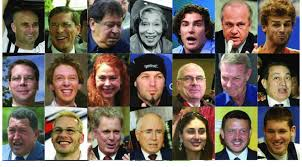
    </td>
  </tr>
  <tr>
    <td align="center">
      <b>Figure 2.</b> Exemples d'images du <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html">dataset LFW</a> (Labeled Faces in the Wild), utilisé pour la reconnaissance faciale.<br/>
      © <a href="https://scikit-learn.org">scikit-learn</a>, CC BY-SA 3.0.
    </td>
  </tr>
</table>

Accuracy visages : 0.9361702127659575


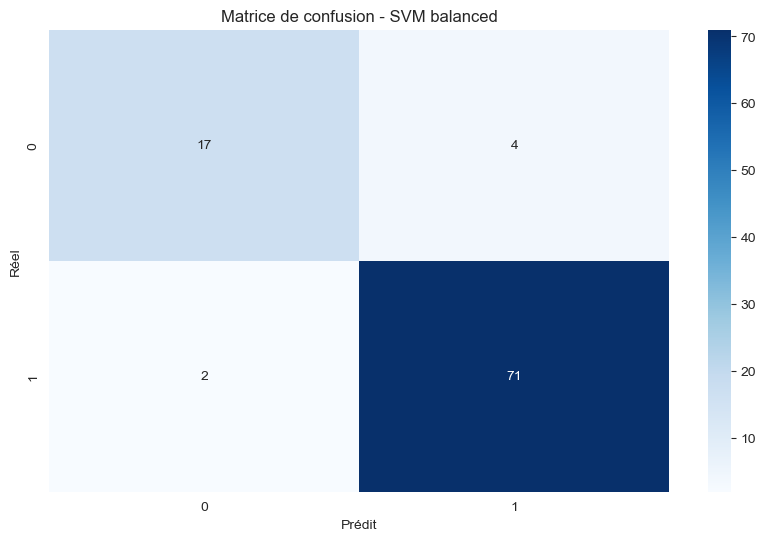

In [22]:
from sklearn.datasets import fetch_lfw_people

# Charger visages (2 personnes)
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = faces.data
y = faces.target

# Réduire à 2 classes (Tony Blair et Colin Powell par exemple)
mask = np.isin(y, [0, 1])  # adapter selon dataset
X = X[mask]
y = y[mask]

# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_face = SVC(kernel="linear", C=1)
clf_face.fit(X_train, y_train)
print("Accuracy visages :", clf_face.score(X_test, y_test))
 

# Matrice de confusion
cm = confusion_matrix(y_test, clf_face.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - SVM balanced")
plt.show()


Accuracy (balanced) : 0.9680851063829787


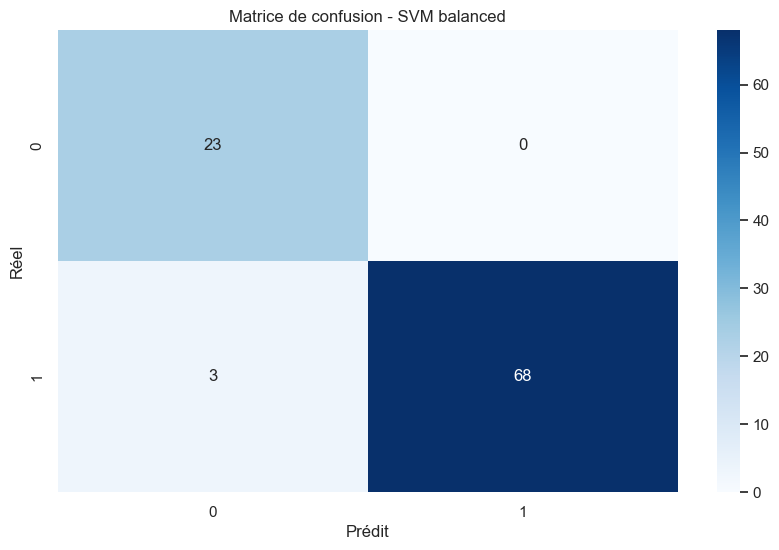

In [49]:
from sklearn.datasets import fetch_lfw_people

# Charger dataset visages (LFW People)
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = faces.data
y = faces.target

# Réduire à deux classes 
mask = np.isin(y, [0, 1])  #  
X = X[mask]
y = y[mask]

# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SVM linéaire avec pondération automatique des classes
clf_face_balanced = SVC(kernel="linear", C=1, class_weight="balanced")
clf_face_balanced.fit(X_train, y_train)

# Évaluation
print("Accuracy (balanced) :", clf_face_balanced.score(X_test, y_test))

# Matrice de confusion
cm = confusion_matrix(y_test, clf_face_balanced.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - SVM balanced")
plt.show()


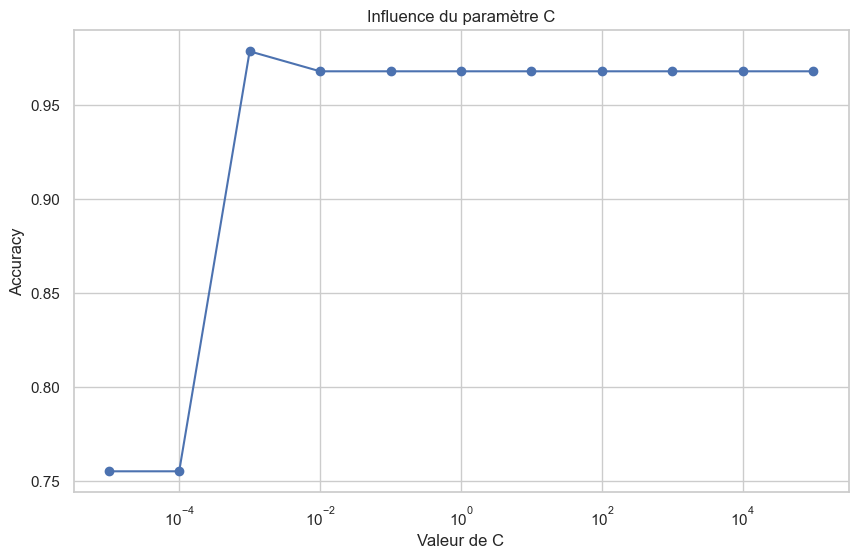

In [51]:
C_values = np.logspace(-5, 5, 11)
acc = []

for c in C_values:
    clf = SVC(kernel="linear", C=c)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))

plt.semilogx(C_values, acc, marker="o")
plt.xlabel("Valeur de C")
plt.ylabel("Accuracy")
plt.title("Influence du paramètre C")
plt.show()


In [17]:
# Ajouter bruit : 300 colonnes bruit
np.random.seed(42)
noise = np.random.randn(X.shape[0], 300)
X_noisy = np.hstack([X, noise])

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

clf_noise = SVC(kernel="linear", C=1)
clf_noise.fit(X_train, y_train)

print("Accuracy avec bruit :", clf_noise.score(X_test, y_test))


Accuracy avec bruit : 0.9468085106382979


Accuracy après PCA : 0.7


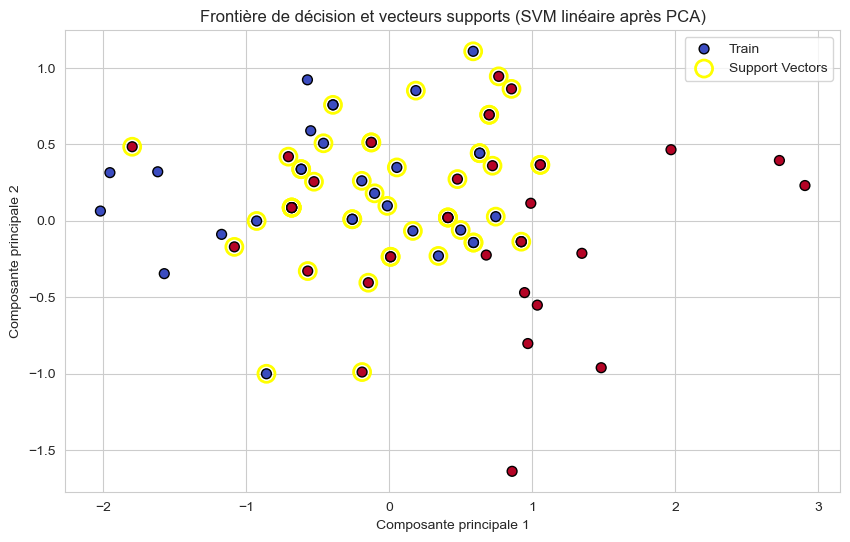

In [9]:
pca = PCA(n_components=2)  # réduire dimension (tu peux changer valeur)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

clf_pca = SVC(kernel="linear", C=1)
clf_pca.fit(X_train, y_train)

print("Accuracy après PCA :", clf_pca.score(X_test, y_test))
 

# Points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors="k", s=50, label="Train")

# Vecteurs supports
plt.scatter(
    clf_pca.support_vectors_[:, 0],
    clf_pca.support_vectors_[:, 1],
    s=150, facecolors="none", edgecolors="yellow", linewidths=2, label="Support Vectors"
)

plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Frontière de décision et vecteurs supports (SVM linéaire après PCA)")
plt.legend()
plt.show()

Meilleurs paramètres : {'C': 10, 'gamma': 'scale'}
Accuracy (RBF optimisé) : 0.9042553191489362
Accuracy (RBF balanced) : 0.9148936170212766
Accuracy (RBF) : 0.8723404255319149


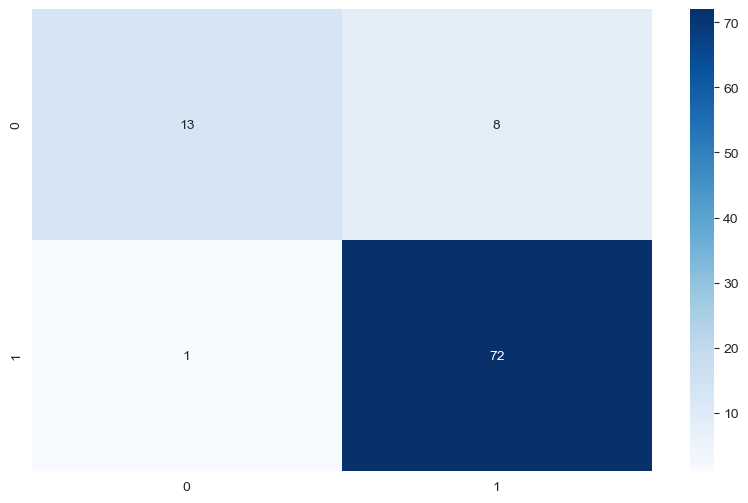

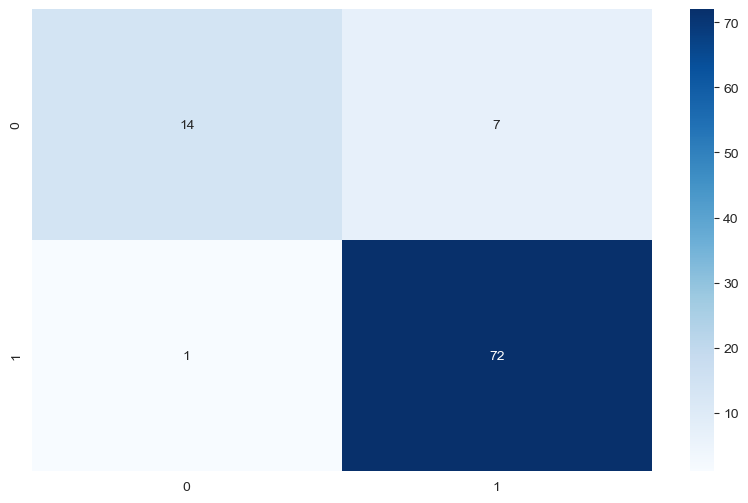

In [26]:
from sklearn.model_selection import GridSearchCV

# Tuner C et gamma
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.01]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Meilleurs paramètres :", grid.best_params_)
print("Accuracy (RBF optimisé) :", grid.score(X_test, y_test))

# RBF avec class_weight='balanced'
clf_rbf_balanced = SVC(kernel="rbf", C=1, gamma="scale", class_weight='balanced')
clf_rbf_balanced.fit(X_train, y_train)
print("Accuracy (RBF balanced) :", clf_rbf_balanced.score(X_test, y_test))
 

clf_rbf = SVC(kernel="rbf", C=1, gamma="scale")
clf_rbf.fit(X_train, y_train)

print("Accuracy (RBF) :", clf_rbf.score(X_test, y_test))

cm_rbf_opt = confusion_matrix(y_test, grid.predict(X_test))
sns.heatmap(cm_rbf_opt, annot=True, fmt="d", cmap="Blues")
plt.show()
cm_rbf_bal = confusion_matrix(y_test, clf_rbf_balanced.predict(X_test))
sns.heatmap(cm_rbf_bal, annot=True, fmt="d", cmap="Blues")
plt.show()

In [23]:
# Exemple basé sur la doc sklearn
X_sep, y_sep = datasets.make_classification(n_samples=50, n_features=2,
                                            n_redundant=0, n_informative=2,
                                            random_state=42, n_clusters_per_class=1)

clf_gap = SVC(kernel="linear", C=1, tol=1e-5)
clf_gap.fit(X_sep, y_sep)

w = clf_gap.coef_[0]
w0 = clf_gap.intercept_[0]

# Calcul primal
hinge_losses = np.maximum(0, 1 - y_sep * (X_sep.dot(w) + w0))
primal = 0.5 * np.dot(w, w) + clf_gap.C * hinge_losses.sum()

# Calcul dual
dual = clf_gap.dual_coef_.dot(clf_gap.support_vectors_).sum() - 0.5 * np.linalg.norm(w)**2

print("Valeur primal :", primal)
print("Valeur duale  :", dual)
print("Gap :", abs(primal - dual))


Valeur primal : 28.360691197792676
Valeur duale  : 0.1854502945769223
Gap : 28.17524090321575


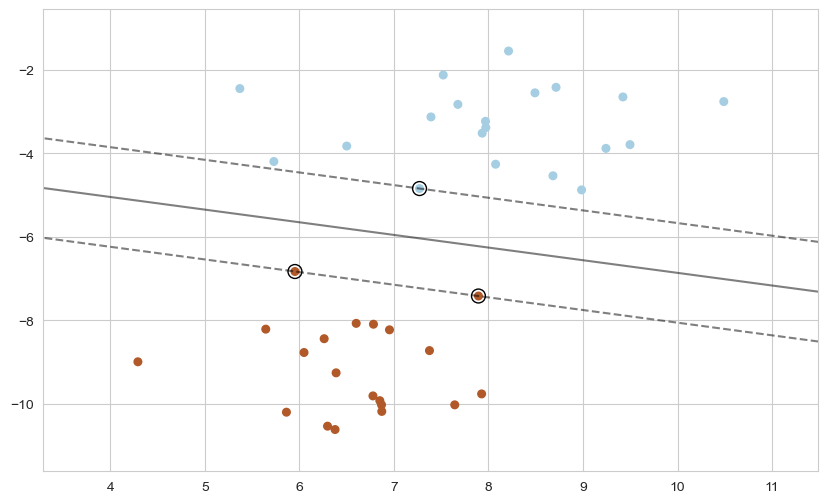

In [11]:
 
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Dataset Iris: 150 échantillons, 4 caractéristiques
Dataset Visages (Digits): 1797 échantillons, 64 caractéristiques

Q1 - SVM Linéaire (Iris classes 1 vs 2):
Précision: 0.8667
Matrice de confusion:
[[10  3]
 [ 1 16]]
Nombre de vecteurs supports par classe: [9 9]

Q2 - SVM Polynomial (Iris classes 1 vs 2):
Précision: 0.8000
Matrice de confusion:
[[13  0]
 [ 6 11]]
Nombre de vecteurs supports par classe: [21 20]


ValueError: n_components=150 must be between 0 and min(n_samples, n_features)=64 with svd_solver='covariance_eigh'

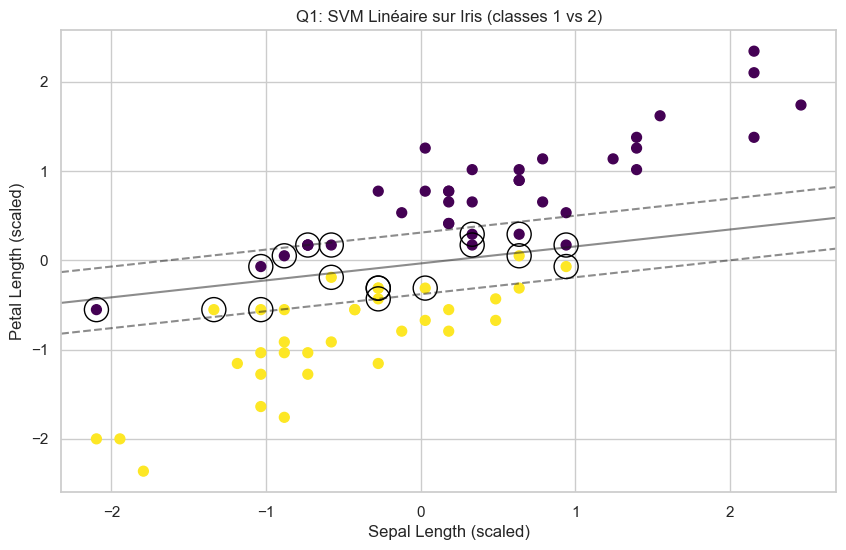

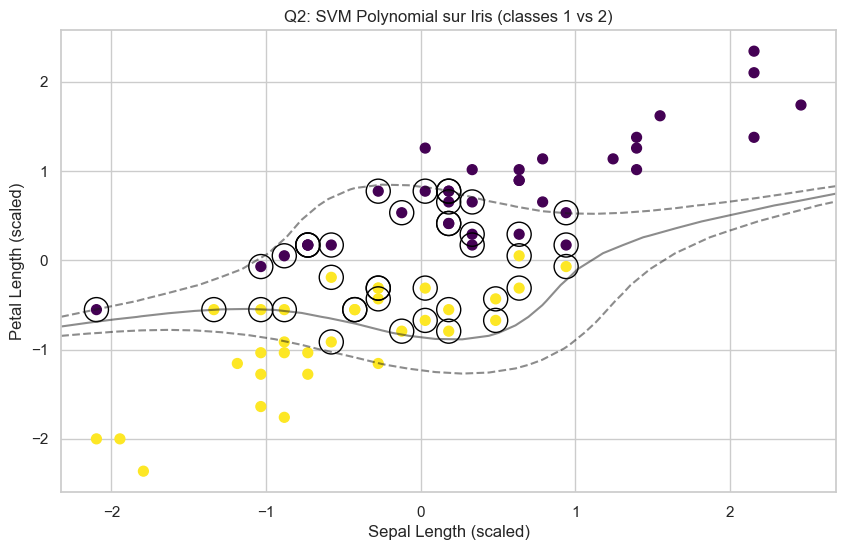

In [25]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import time

# Configuration de Matplotlib et Seaborn pour de meilleurs graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# --- Chargement des datasets ---

# Dataset Iris
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Dataset alternatif pour Visages : Utiliser load_digits (local, pas de download)
digits = datasets.load_digits()
X_faces = digits.data  # Images flattenées (64 features)
y_faces = digits.target
target_names_faces = [str(i) for i in range(10)]  # Classes 0-9
n_features_faces = X_faces.shape[1]
n_classes_faces = len(target_names_faces)

 

print(f'Dataset Iris: {X_iris.shape[0]} échantillons, {X_iris.shape[1]} caractéristiques')
print(f'Dataset Visages (Digits): {X_faces.shape[0]} échantillons, {X_faces.shape[1]} caractéristiques')

# --- Fonctions utilitaires pour la visualisation ---

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Trace la fonction de décision pour un SVC 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Création d'une grille pour évaluer le modèle
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Affichage des frontières de décision et des marges
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Affichage des vecteurs supports
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# --- Q1 : Classification Iris (classe 1 vs 2) avec noyau linéaire ---

# Filtrer le dataset Iris pour les classes 1 et 2
iris_binary_idx = np.where((y_iris == 1) | (y_iris == 2))[0]  # Ajout [0] pour indice correct
X_iris_binary = X_iris[iris_binary_idx]
y_iris_binary = y_iris[iris_binary_idx]
y_iris_binary[y_iris_binary == 2] = 0  # Re-étiqueter la classe 2 en 0 pour binaire

# Utiliser seulement deux caractéristiques pour la visualisation (sepal length et petal length)
X_iris_2d = X_iris_binary[:, [0, 2]]

# Séparer les données en ensembles d'entraînement et de test
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris_2d, y_iris_binary, test_size=0.3, random_state=42)

# Standardisation des données
scaler_iris = StandardScaler()
X_train_scaled_iris = scaler_iris.fit_transform(X_train_iris)
X_test_scaled_iris = scaler_iris.transform(X_test_iris)

# Entraînement du SVM avec noyau linéaire
svc_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear.fit(X_train_scaled_iris, y_train_iris)

# Prédictions et évaluation
y_pred_linear = svc_linear.predict(X_test_scaled_iris)
accuracy_linear = accuracy_score(y_test_iris, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test_iris, y_pred_linear)
n_support_vectors_linear = svc_linear.n_support_

print('\nQ1 - SVM Linéaire (Iris classes 1 vs 2):')
print(f'Précision: {accuracy_linear:.4f}')
print(f'Matrice de confusion:\n{conf_matrix_linear}')
print(f'Nombre de vecteurs supports par classe: {n_support_vectors_linear}')

# Visualisation des résultats
plt.figure()
plt.scatter(X_train_scaled_iris[:, 0], X_train_scaled_iris[:, 1], c=y_train_iris, s=50, cmap='viridis')
plot_svc_decision_function(svc_linear)
plt.title('Q1: SVM Linéaire sur Iris (classes 1 vs 2)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.savefig('q1_iris_linear_svm.png')

# --- Q2 : Comparaison avec noyau polynomial ---

# Entraînement du SVM avec noyau polynomial
svc_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svc_poly.fit(X_train_scaled_iris, y_train_iris)

# Prédictions et évaluation
y_pred_poly = svc_poly.predict(X_test_scaled_iris)
accuracy_poly = accuracy_score(y_test_iris, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test_iris, y_pred_poly)
n_support_vectors_poly = svc_poly.n_support_

print('\nQ2 - SVM Polynomial (Iris classes 1 vs 2):')
print(f'Précision: {accuracy_poly:.4f}')
print(f'Matrice de confusion:\n{conf_matrix_poly}')
print(f'Nombre de vecteurs supports par classe: {n_support_vectors_poly}')

# Visualisation des résultats
plt.figure()
plt.scatter(X_train_scaled_iris[:, 0], X_train_scaled_iris[:, 1], c=y_train_iris, s=50, cmap='viridis')
plot_svc_decision_function(svc_poly)
plt.title('Q2: SVM Polynomial sur Iris (classes 1 vs 2)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.savefig('q2_iris_poly_svm.png')

# --- Q5-Q8 : Classification visages + influence du paramètre C + ajout de bruit + PCA ---

# Q5: Utilisez les features centrées et réduites   
# Standardisation des données visages
scaler_faces = StandardScaler()
X_faces_scaled = scaler_faces.fit_transform(X_faces)

# Réduction de la dimensionnalité avec PCA pour accélérer et réduire le bruit
n_components = 150
pca_faces = PCA(n_components=n_components, whiten=True, random_state=42)
X_faces_pca = pca_faces.fit_transform(X_faces_scaled)

X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(X_faces_pca, y_faces, test_size=0.25, random_state=42)

print('\nQ5 - Classification des visages avec SVM (noyau RBF):')
svc_faces = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svc_faces.fit(X_train_faces, y_train_faces)
y_pred_faces = svc_faces.predict(X_test_faces)
accuracy_faces = accuracy_score(y_test_faces, y_pred_faces)

print(f'Précision (Visages): {accuracy_faces:.4f}')
print(classification_report(y_test_faces, y_pred_faces, target_names=target_names_faces))

# Q6: Influence du paramètre C (échelle log de 1e-5 à 1e5)
print('\nQ6 - Influence du paramètre C sur la classification des visages:')
C_values = np.logspace(-5, 5, 6)
accuracies_C = []
for C in C_values:
    svc_C = SVC(kernel='rbf', C=C, class_weight='balanced', random_state=42)
    svc_C.fit(X_train_faces, y_train_faces)
    y_pred_C = svc_C.predict(X_test_faces)
    acc_C = accuracy_score(y_test_faces, y_pred_C)
    accuracies_C.append(acc_C)
    print(f'  C={C:.1e}: Précision = {acc_C:.4f}')

plt.figure()
plt.plot(C_values, accuracies_C, marker='o')
plt.xscale('log')
plt.title('Q6: Influence du paramètre C sur la précision du SVM (Visages)')
plt.xlabel('Valeur de C (log scale)')
plt.ylabel('Précision')
plt.savefig('q6_faces_C_influence.png')

# Q7: Ajout de bruit (300 variables normales centrées réduites) aux visages
print('\nQ7 - Ajout de bruit au dataset Visages:')
n_samples_faces = X_faces_scaled.shape[0]
n_noisy_features = 300
noisy_features = np.random.randn(n_samples_faces, n_noisy_features)  # Bruit gaussien centré réduit (std=1, mais scaler le gérera)
X_faces_noisy = np.hstack((X_faces_scaled, noisy_features))

# Standardiser le noisy (déjà centré, mais pour cohérence)
scaler_noisy = StandardScaler()
X_faces_noisy_scaled = scaler_noisy.fit_transform(X_faces_noisy)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_faces_noisy_scaled, y_faces, test_size=0.25, random_state=42)

# Entraînement du SVM rbf sur données bruitées
svc_noisy = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svc_noisy.fit(X_train_noisy, y_train_noisy)
y_pred_noisy = svc_noisy.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test_noisy, y_pred_noisy)

print(f'Précision SVM RBF avec bruit: {accuracy_noisy:.4f}')  # Devrait chuter vs sans bruit

# Q8: Amélioration par PCA sur dataset bruité
print('\nQ8 - Amélioration par PCA sur le dataset Visages bruité:')
pca_noisy = PCA(n_components=150, whiten=True, random_state=42)  # Réduire dimensions
X_train_pca_noisy = pca_noisy.fit_transform(X_train_noisy)
X_test_pca_noisy = pca_noisy.transform(X_test_noisy)

# Entraînement du SVM sur données réduites
svc_pca = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svc_pca.fit(X_train_pca_noisy, y_train_noisy)
y_pred_pca = svc_pca.predict(X_test_pca_noisy)
accuracy_pca = accuracy_score(y_test_noisy, y_pred_pca)

print(f'Précision SVM RBF après PCA sur données bruitées: {accuracy_pca:.4f}')  # Devrait améliorer

# --- Q9 (optionnel) : Effet d’un noyau RBF ---

print('\nQ9 - Effet d’un noyau RBF sur le dataset Iris:')
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # 'scale' au lieu de 'auto'
svc_rbf.fit(X_train_scaled_iris, y_train_iris)

y_pred_rbf = svc_rbf.predict(X_test_scaled_iris)
accuracy_rbf = accuracy_score(y_test_iris, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test_iris, y_pred_rbf)
n_support_vectors_rbf = svc_rbf.n_support_

print(f'Précision SVM RBF (Iris classes 1 vs 2): {accuracy_rbf:.4f}')
print(f'Matrice de confusion:\n{conf_matrix_rbf}')
print(f'Nombre de vecteurs supports par classe: {n_support_vectors_rbf}')

plt.figure()
plt.scatter(X_train_scaled_iris[:, 0], X_train_scaled_iris[:, 1], c=y_train_iris, s=50, cmap='viridis')
plot_svc_decision_function(svc_rbf)
plt.title('Q9: SVM RBF sur Iris (classes 1 vs 2)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Petal Length (scaled)')
plt.savefig('q9_iris_rbf_svm.png')

# --- Q10 : Calcul du primal/dual gap et analyse en fonction du paramètre tol ---

print('\nQ10 - Analyse du primal/dual gap et du paramètre tol:')
from sklearn.datasets import make_blobs

X_sim, y_sim = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6)
y_sim[y_sim == 0] = -1  # Mapper directement en {-1, 1} pour primal/dual
X_train_sim, X_test_sim, y_train_sim, y_test_sim = train_test_split(X_sim, y_sim, test_size=0.3, random_state=42)

tol_values = np.logspace(-1, -5, 5)  # De 1e-1 à 1e-5
C = 1.0
gaps = []

def compute_primal(clf, X, y, C):
    w = clf.coef_[0]
    b = clf.intercept_[0]
    margins = y * (np.dot(X, w) + b)
    hinge_loss = np.maximum(0, 1 - margins)
    return 0.5 * np.dot(w, w) + C * np.sum(hinge_loss)

def compute_dual(clf, C):
    alphas = np.abs(clf.dual_coef_[0])  # alphas positives
    w = clf.coef_[0]
    return np.sum(alphas) - 0.5 * np.dot(w, w)

for tol in tol_values:
    svc_tol = SVC(kernel='linear', C=C, tol=tol, random_state=42)
    svc_tol.fit(X_train_sim, y_train_sim)
    
    primal_val = compute_primal(svc_tol, X_train_sim, y_train_sim, C)
    dual_val = compute_dual(svc_tol, C)
    gap = primal_val - dual_val
    gaps.append(gap)
    
    print(f'  tol={tol:.1e}: Primal = {primal_val:.4f}, Dual = {dual_val:.4f}, Gap = {gap:.4f}')

plt.figure()
plt.plot(tol_values, gaps, marker='o')
plt.xscale('log')
plt.title('Q10: Duality Gap vs. tol')
plt.xlabel('Valeur de tol (log scale)')
plt.ylabel('Duality Gap')
plt.savefig('q10_duality_gap.png')

`average='weighted` → pondère les classes selon leur proportion (important pour datasets déséquilibrés).

`precision_score `→ mesure la proportion de prédictions correctes parmi celles positives.

`recall_score` → mesure la proportion de vrais positifs détectés.

`f1_score` → compromis entre précision et rappel.

In [9]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Après avoir fait les prédictions
y_pred = clf_lin.predict(X_test)

# Accuracy classique
print("Accuracy :", accuracy_score(y_test, y_pred))

# Matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

# Métriques complémentaires
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

# Rapport complet par classe
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred, digits=3))


Accuracy : 0.7
Matrice de confusion :
 [[16 14]
 [ 1 19]]
Précision : 0.7950089126559715
Rappel : 0.7
F1-score : 0.695303091128061

Rapport de classification :

              precision    recall  f1-score   support

           1      0.941     0.533     0.681        30
           2      0.576     0.950     0.717        20

    accuracy                          0.700        50
   macro avg      0.758     0.742     0.699        50
weighted avg      0.795     0.700     0.695        50



Tol: 0.001, Hinge sum: 1.9158382479900204e-05, Primal: 0.15581151832731321, Dual: 0.1557921101060322, Gap: 1.9408221281019822e-05
Tol: 0.0001, Hinge sum: 1.9158382479900204e-05, Primal: 0.15581151832731321, Dual: 0.1557921101060322, Gap: 1.9408221281019822e-05
Tol: 1e-05, Hinge sum: 0.0, Primal: 0.15579235940279723, Dual: 0.15579211064806833, Gap: 2.4875472889873684e-07
Tol: 1e-06, Hinge sum: 1.6451426998465024e-08, Primal: 0.15579219070567302, Dual: 0.15579211064814766, Gap: 8.005752535900079e-08
Tol: 1e-07, Hinge sum: 0.0, Primal: 0.15579213214467702, Dual: 0.15579211064816692, Gap: 2.1496510099749955e-08
Tol: 1e-08, Hinge sum: 0.0, Primal: 0.15579213214467702, Dual: 0.15579211064816692, Gap: 2.1496510099749955e-08


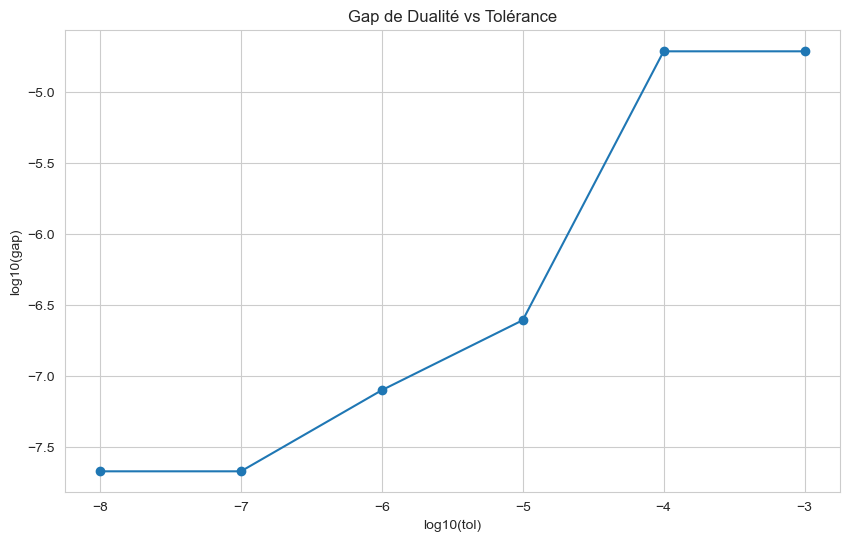

Tols: [0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08]
Gaps: [1.9408221281019822e-05, 1.9408221281019822e-05, 2.4875472889873684e-07, 8.005752535900079e-08, 2.1496510099749955e-08, 2.1496510099749955e-08]
Primals: [0.15581151832731321, 0.15581151832731321, 0.15579235940279723, 0.15579219070567302, 0.15579213214467702, 0.15579213214467702]
Duals: [0.1557921101060322, 0.1557921101060322, 0.15579211064806833, 0.15579211064814766, 0.15579211064816692, 0.15579211064816692]
Hinge sums: [1.9158382479900204e-05, 1.9158382479900204e-05, 0.0, 1.6451426998465024e-08, 0.0, 0.0]


In [30]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt

# Génération du dataset ajusté pour séparabilité
X_sep, y_sep = datasets.make_classification(n_samples=50, n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1, flip_y=0, class_sep=3)

# Mapper y à {-1, 1}
y_sep = 2 * y_sep - 1

# Tolérances à tester
tols = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
gaps = []
primals = []
duals = []
hinge_sums = []

for tol in tols:
    clf_gap = SVC(kernel="linear", C=1, tol=tol)
    clf_gap.fit(X_sep, y_sep)
    
    w = clf_gap.coef_[0]
    w0 = clf_gap.intercept_[0]
    
    # Calcul primal
    hinge_losses = np.maximum(0, 1 - y_sep * (X_sep.dot(w) + w0))
    hinge_sum = hinge_losses.sum()
    primal = 0.5 * np.dot(w, w) + clf_gap.C * hinge_sum
    
    # Calcul dual corrigé
    support_indices = clf_gap.support_
    y_sv = y_sep[support_indices]
    dual_coef = clf_gap.dual_coef_[0]  # alpha_i * y_i pour SV
    alpha = dual_coef / y_sv  # alpha_i = (alpha_i * y_i) / y_i
    sum_alpha = np.sum(alpha)
    norm_w_sq = np.linalg.norm(w)**2
    dual = sum_alpha - 0.5 * norm_w_sq
    
    gap = abs(primal - dual)
    gaps.append(gap)
    primals.append(primal)
    duals.append(dual)
    hinge_sums.append(hinge_sum)
    
    print(f"Tol: {tol}, Hinge sum: {hinge_sum}, Primal: {primal}, Dual: {dual}, Gap: {gap}")

# Plot gap vs tol (échelle log)
plt.figure()
plt.plot(np.log10(tols), np.log10(gaps), marker='o')
plt.xlabel('log10(tol)')
plt.ylabel('log10(gap)')
plt.title('Gap de Dualité vs Tolérance')
plt.grid(True)
plt.show()

# Listes pour référence
print("Tols:", tols)
print("Gaps:", gaps)
print("Primals:", primals)
print("Duals:", duals)
print("Hinge sums:", hinge_sums)